In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("dataset.csv")
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
from io import StringIO
import pandas as pd  # Added import for pandas

csv_data=\
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.9,,8.0
10.0,11.0,12.0'''  # Removed trailing commas from lines 3 and 4

df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.9,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [5]:
df.values

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6.9,  nan,  8. ],
       [10. , 11. , 12. ,  nan]])

In [6]:
data.values

array([['France', 44.0, 72000.0, 'No'],
       ['Spain', 27.0, 48000.0, 'Yes'],
       ['Germany', 30.0, 54000.0, 'No'],
       ['Spain', 38.0, 61000.0, 'No'],
       ['Germany', 40.0, nan, 'Yes'],
       ['France', 35.0, 58000.0, 'Yes'],
       ['Spain', nan, 52000.0, 'No'],
       ['France', 48.0, 79000.0, 'Yes'],
       ['Germany', 50.0, 83000.0, 'No'],
       ['France', 37.0, 67000.0, 'Yes']], dtype=object)

In [7]:
#dropping the rows containing missing or Nan values in data dataset using dropna


In [8]:
df.dropna(axis=0)


,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.9
2,10.0,11.0


In [10]:
# !git add Data_preprocessing.ipynb
# !git commit -m "Data Preprocessing"
# !git push

In [11]:
##we use simpleImputer to replace the missing cell with the mean value of that whole column

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6.9,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [13]:
#using pandas to perform work performed by simpleimputer
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.9,7.5,8.0
2,10.0,11.0,12.0,6.0


In [14]:
#to learn categorical encoding with pandas

In [15]:
import pandas as pd
df2=pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df2.columns=['color','size','price','classlabel']
df2
    

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [16]:
size_mapping={'XL':3,
              'L':2,
              'M':1}
df2['size']=df2['size'].map(size_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [17]:
import numpy as np
class_mapping={label:idx for idx, label in
               enumerate(np.unique(df2['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [18]:
df2['classlabel']=df2['classlabel'].map(class_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [19]:
# !git add Data_preprocessing.ipynb
# !git commit -m "Data Preprocessing"
# !git push

In [20]:
#using labelencoder in sicikt learn
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df2['classlabel'].values)
y

array([1, 0, 1], dtype=int64)

In [21]:
x=df2[['color','size','price']].values
color_le=LabelEncoder()
x[:,0]=color_le.fit_transform(x[:,0])
x

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [22]:
#using one hot encoder

In [23]:
from sklearn.preprocessing import OneHotEncoder
x=df2[['color','size','price']].values
color_ohe=OneHotEncoder()
color_ohe.fit_transform(x[:,0].reshape(-1,1)).toarray()


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  # Added missing import

x = df2[['color', 'size', 'price']].values
c_trans = ColumnTransformer([  # Fixed typo: ColumnTransform -> ColumnTransformer
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_trans.fit_transform(x).astype(float)  # Fixed variable name and removed indentation

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [25]:
# !git add Data_preprocessing.ipynb
# !git commit -m "22 August 2025"
# !git push

In [26]:
pd.get_dummies(df2[['price','color','size']],
               drop_first=True)


,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [27]:
color_ohe=OneHotEncoder(categories='auto',drop='first')
c_transf=ColumnTransformer([
    ('onehot',color_ohe,[0]),
    ('nothing','passthrough',[1,2])
])
c_transf.fit_transform(x).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [28]:
## creating a new wine dataset
wine=pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None
)

In [29]:
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
##to assigne the names to the columns
wine.columns=['Class label', 'Alcohol',
               'Malic acid', 'Ash',
               'Alcalinity of ash', 'Magnesium',
               'Total phenols', 'Flavanoids',
               'Nonflavanoid phenols',
               'Proanthocyanins',
               'Color intensity', 'Hue',
               'OD280/OD315 of diluted wines',
               'Proline']
print('Class labels', np.unique(wine ['Class label']))

              

Class labels [1 2 3]


In [31]:
wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
##To randomly partition this dataset into separate test and training dataset is to use train_test_split
from sklearn.model_selection import train_test_split
x,y=wine.iloc[:, 1:].values, wine.iloc[:, 0].values
x_train,x_test,y_train,y_test=\
    train_test_split(x,y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

In [33]:
##Min Max Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train_norm=mms.fit_transform(x_train)
x_test_norm=mms.transform(x_test)

In [35]:
##standardization using scikit learn
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
x_train_std=stdsc.fit_transform(x_train)
x_test_std=stdsc.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1',
                   solver='liblinear',
                   multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [37]:
lr=LogisticRegression(penalty='l1',
                      C=1.0,
                      solver='liblinear',  # Fixed: changed 'linlinear' to 'liblinear'
                      multi_class='ovr')
lr.fit(x_train_std,y_train)
print('Training accuracy:',lr.score(x_train_std,y_train))

Training accuracy: 1.0


D:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [38]:
lr.intercept_

array([-1.26354341, -1.21589886, -2.3708723 ])

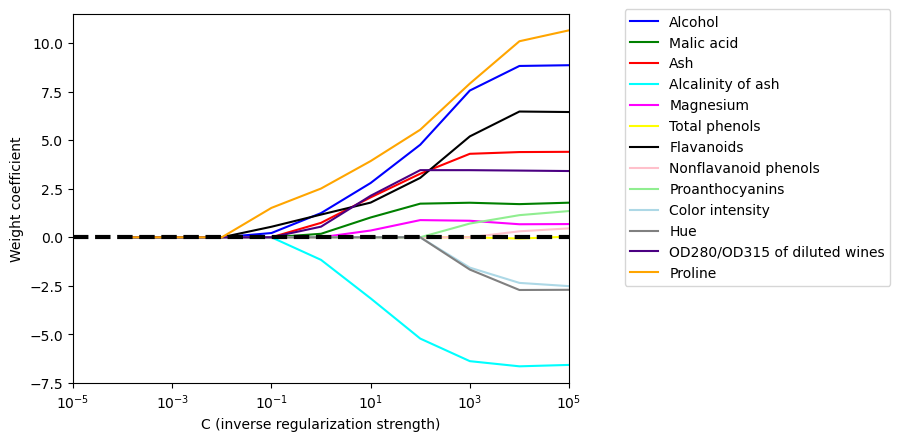

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

fig = plt.figure()
ax = plt.subplot()

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
    lr = OneVsRestClassifier(LogisticRegression(
        penalty='l1',
        C=10. ** c,
        solver='liblinear',
        random_state=0
    ))
    lr.fit(x_train_std, y_train)
    
    # Assuming binary classification or multi-class with consistent shape
    weights.append(lr.estimators_[0].coef_[0])  # Adjust index if needed
    params.append(10 ** c)

weights=np.array(weights)
for columns, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:, columns],  # Changed 'column' to 'columns' to match the loop variable
             label=wine.columns[columns+1],  # Changed 'column' to 'columns' here too
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [40]:
!git add Data_preprocessing.ipynb
!git commit -m "regularization"
!git push

[main 584767c] regularization
 1 file changed, 28 insertions(+), 2 deletions(-)


To https://github.com/yogendra785/ML-with-pytorch-and-scikit-learn.git
   fe8a964..584767c  main -> main


In [43]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(self,estimator,k_features,
                 scoring=accuracy_score,
                 test_size=0.25,random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,x,y):
        x_train,x_test,y_train,y_test=\
            train_test_split(x,y,test_size=self.test_size,
                             random_state=self.random_state)
        dim=x_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(x_train,y_train,
                               x_test,y_test,self.indices_)
        self.score_=[score]
        while dim>self.k_features:
            scores=[]
            subsets=[]

            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(x_train,y_train,
                                       x_test,y_test,p)
                scores.append(score)  # Fixed indentation here
                subsets.append(p)     # Fixed indentation here
            best=np.argmax(scores)    # Fixed indentation here
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)  # Fixed typo: subests_ -> subsets_
            dim -=1

            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]  # Fixed indentation here

        return self

    def transform(self,x):  # Fixed indentation here
        return x[:, self.indices_]

    def _calc_score(self,x_train,y_train,x_test,y_test,indices):  # Fixed indentation here
        self.estimator.fit(x_train[:, indices], y_train)  # Fixed variable name: X_train -> x_train
        y_pred = self.estimator.predict(x_test[:, indices])  # Fixed variable name: X_test -> x_test
        score = self.scoring(y_test, y_pred)
        return score